<a href="https://colab.research.google.com/github/Zerowl7/data_analys_test/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Есть датасет такси на котором я потренеруюсь

In [9]:
churn_data = pd.read_csv('churn_data.txt')
churn_data.head()

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_inc_price,inc_pct,weekday_pct,fancy_car_user,city_Carthag,city_Harko,phone_iPhone,first_month_cat_more_1_trip,first_month_cat_no_trips,month_5_still_here
0,0,3.67,5.0,4.7,1.10,15.4,46.2,True,0,1,1,1,0,1
1,1,8.26,5.0,5.0,1.00,0.0,50.0,False,1,0,0,0,1,0
2,2,0.77,5.0,4.3,1.00,0.0,100.0,False,1,0,1,1,0,0
3,3,2.36,4.9,4.6,1.14,20.0,80.0,True,0,1,1,1,0,1
4,4,3.13,4.9,4.4,1.19,11.8,82.4,False,0,0,0,1,0,0


In [10]:
churn_data.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
# Создаем array с нашими фичами month_5_still_here - таргет
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Создаем 2 датасета
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2, random_state=123)

In [12]:
X_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_inc_price,inc_pct,weekday_pct,fancy_car_user,city_Carthag,city_Harko,phone_iPhone,first_month_cat_more_1_trip,first_month_cat_no_trips
2660,3.50,5.0,5.0,1.0,0.0,100.0,False,0,0,0,0,0
32815,4.51,4.6,5.0,1.0,0.0,75.0,False,0,0,0,1,0
35141,16.38,5.0,NaN,1.0,0.0,100.0,True,0,0,1,0,1
19390,6.60,5.0,5.0,1.0,0.0,0.0,False,0,0,1,0,0
34846,5.62,5.0,NaN,1.0,0.0,0.0,False,1,0,0,0,0


In [13]:
y_train.head()

2660     0
32815    0
35141    0
19390    0
34846    0
Name: month_5_still_here, dtype: int64

In [14]:
# экземпляр XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit 
xg_cl.fit(X_train, y_train)

# предикт
preds = xg_cl.predict(X_test)

# accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.743300


# Measuring accuracy

In [15]:
# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.28232         0.002366          0.28378        0.001932
1           0.26951         0.001855          0.27190        0.001932
2           0.25605         0.003213          0.25798        0.003963
3           0.25090         0.001845          0.25434        0.003827
4           0.24654         0.001981          0.24852        0.000934
0.75148


# Measuring AUC

In [16]:
# кросс-валидация: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.768893       0.001544       0.767863      0.002820
1        0.790864       0.006758       0.789157      0.006846
2        0.815872       0.003900       0.814476      0.005997
3        0.822959       0.002018       0.821682      0.003912
4        0.827528       0.000769       0.826191      0.001937
0.826191


Перекрёстная прове́рка — метод оценки аналитической модели и её поведения на независимых данных.

# Регрессия в XGBoost

Датасет с недвижимостью, которую я могу использовать для регрессии

In [19]:
df = pd.read_csv('house-prices.csv')
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


Будем предсказывать цену дома

In [20]:
X = df.drop(columns=['SalePrice'])
y = df.SalePrice

# Деревья решений

Давайте попробуем построить модель XGBoost для прогнозирования цен на жилье в Бостоне, штат Массачусетс.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)


xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123, booster="gbtree")


xg_reg.fit(X_train, y_train)


preds = xg_reg.predict(X_test)

#Потеря регрессии среднеквадратичной ошибки.
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 78847.401758


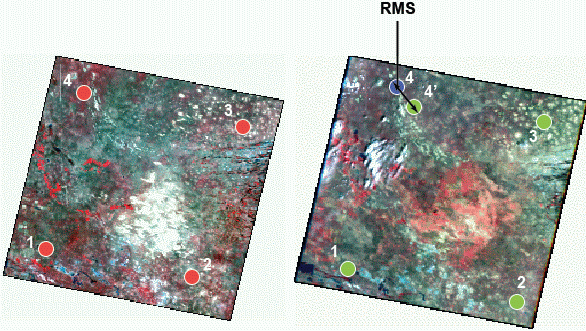

Теперь мы можем обучать модель XGBoost, используя линейные базовые обучающие программы и API обучения XGBoost.

# Linear base learners


In [25]:
# Преобразование наборов для обучения и тестирования в DMatrix: 
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Создадим словарь параметров: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Обучить модель: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Предсказать метки набора тестов: preds 
preds = xg_reg.predict(DM_test)


rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

[13:54:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 44331.645061


Похоже, что ученики с линейной базой показали лучшие результаты. Теперь мы сравним RMSE и MAE перекрестной проверки модели XGBoost на данных о жилье Эймса.


In [26]:
housing_dmatrix = xgb.DMatrix(data=X, label=y)


params = {"objective":"reg:linear", "max_depth":4}


cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)


print(cv_results)


print((cv_results["test-mae-mean"]).tail(1))

[13:55:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.595703     668.167771  127634.185547   2404.009753
1    89770.031250     456.980559   90122.505860   2107.916842
2    63580.782226     263.442189   64278.558594   1887.552548
3    45633.181640     151.849960   46819.175781   1459.821980
4    33587.097656      87.003217   35670.655274   1140.613227
4    35670.655274
Name: test-mae-mean, dtype: float64


# Использование регуляризации в XGBoost

Регуляризация относится к концепции наказания моделей по мере их усложнения. В результате модели, которые являются точными и настолько простыми, насколько это возможно, могут быть найдены с использованием функций потерь в XGBoost. В XGBoost можно изменить ряд параметров, чтобы уменьшить сложность модели, изменив функцию потерь. Для обучающихся на основе дерева параметр гаммы определяет, будет ли конкретный узел разделяться на основе ожидаемого уменьшения потерь, которые последуют за разделением, причем большие значения приводят к меньшему количеству разделений. Более сильная регуляризация L1 вызвана более высокими значениями альфа, что приводит к тому, что многие веса листьев в базовых обучающихся становятся равными нулю. Другое название регуляризации l2 — лямбда. Вместо того, чтобы устанавливать строгие ограничения разреженности на веса листьев, как в l1,

In [28]:
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]


params = {"objective":"reg:linear","max_depth":3}

# Создать пустой список для хранения rmses как функции сложности l
rmses_l2 = []


for reg in reg_params:

 # Обновить    
    params["lambda"] = reg
    
# Передать этот обновленный словарь параметров в cv    
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
# Добавляем лучшее среднеквадратичное значение (последний раунд) к rmses_l2     
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Посмотрите лучший rmse для параметра l2
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

[13:58:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:58:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:58:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:58:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:58:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:58:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best rmse as a function of l2:
    l2          rmse
0    1  52275.355469
1   10  57746.060547
2  100  76624.617188


Похоже, что значение 'lambda'увеличивается, как и RMSE. Мы построили и оценили модели классификации и регрессии, используя XGBoost; мы должны иметь возможность визуально исследовать ваши модели. Теперь мы визуализируем полностью усиленную модель, которую генерирует XGBoost, используя весь набор данных о жилье в виде отдельных деревьев.

[14:01:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


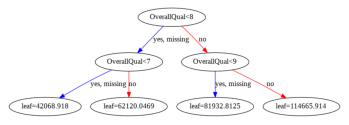

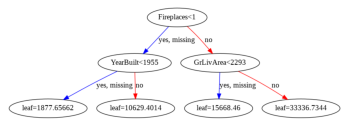

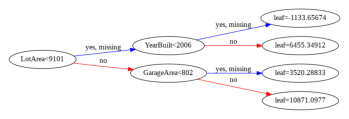

In [33]:
# Создадим DMatrix: Housing_dmatrix 
Housing_dmatrix = xgb.DMatrix(data=X, label=y)
# Создадим словарь параметров: params 
params = {"objective":"reg:linear", "max_depth":2}
# Обучить модель: xg_reg 
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)
# Построить первое дерево 
xgb.plot_tree(xg_reg,num_trees=0) 
plt.show()
# Построить пятое дерево 
xgb.plot_tree(xg_reg,num_trees=4) 
plt.show()
# Отображение последнего дерева сбоку 
xgb.plot_tree(xg_reg,num_trees=9,rankdir="LR") 
plt.show()

Мы пролили свет на расхождения, которые модель использовала для своих окончательных суждений, а также на то, как она пришла к этим решениям. Это позволяет нам определить, какие характеристики имеют решающее значение при определении цены дома. Изучение относительных весов каждого столбца признаков в исходном наборе данных в модели — еще один подход к визуализации наших моделей XGBoost.

[14:02:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


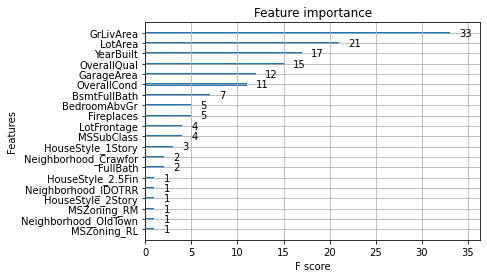

In [34]:
# Создадим DMatrix: Housing_dmatrix 
Housing_dmatrix = xgb.DMatrix(data=X, label=y)
# Создадим словарь параметров: params 
params = {"objective":"reg:linear", "max_depth":4}
# Обучить модель: xg_reg 
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)
# Отображение важности признаков 
xgb.plot_importance(xg_reg) 
plt.show()

Таким образом, мы увидели из этого примера, что GrLivAreaэто самая важная особенность. Таким образом, эту функцию XGboost можно использовать для разработки функций.



In [37]:
df.GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

Above grade (ground) living area square feet (Тоесть сколько квадратных метров наша недвижимость)